In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_squared_log_error

In [2]:
df = pd.read_csv('wine.csv')

In [3]:
outcome = 'points'

x_cols= ['price', 'prov_alsace',
       'prov_beaujolais', 'prov_bordeaux', 'prov_burgundy', 'prov_california',
       'prov_central_italy', 'prov_champagne', 'prov_colorado',
       'prov_france_other', 'prov_idaho', 'prov_languedoc_roussillon',
       'prov_loire_valley', 'prov_lombardy', 'prov_michigan', 'prov_new_york',
       'prov_northeastern_italy', 'prov_oregon', 'prov_piedmont',
       'prov_provence', 'prov_rhône_valley', 'prov_sicily_and_sardinia',
       'prov_southern_italy', 'prov_southwest_france', 'prov_texas',
       'prov_tuscany', 'prov_veneto', 'prov_virginia', 'prov_washington',
       'taster_alexander_peartree', 'taster_anna_lee_c_iijima',
       'taster_anne_krebiehl_mw', 'taster_carrie_dykes', 'taster_jim_gordon',
       'taster_joe_czerwinski', 'taster_kerin_okeefe', 'taster_lauren_buzzeo',
       'taster_matt_kettmann', 'taster_paul_gregutt', 'taster_roger_voss',
       'taster_sean_p_sullivan', 'taster_susan_kostrzewa',
       'taster_undisclosed', 'taster_virginie_boone',
       'grape_cabernet_sauvignon', 'grape_chardonnay', 'grape_malbec',
       'grape_merlot', 'grape_pinot_grigio', 'grape_pinot_noir',
       'grape_red_blend', 'grape_riesling', 'grape_rosé',
       'grape_sauvignon_blanc', 'grape_white_blend', 'grape_zinfandel',
       'vintage_2000', 'vintage_2001', 'vintage_2002', 'vintage_2003',
       'vintage_2004', 'vintage_2005', 'vintage_2006', 'vintage_2007',
       'vintage_2008', 'vintage_2009', 'vintage_2010', 'vintage_2011',
       'vintage_2012', 'vintage_2013', 'vintage_2014', 'vintage_2015',
       'vintage_2016']

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.232
Model:                            OLS   Adj. R-squared:                  0.231
Method:                 Least Squares   F-statistic:                     264.8
Date:                Fri, 29 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:07:30   Log-Likelihood:            -1.4729e+05
No. Observations:               60657   AIC:                         2.947e+05
Df Residuals:                   60587   BIC:                         2.953e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    70.1259      0.051   1361.763      0.000      70.025      70.227
price                         0.0233      0.000     94.147      0.000       0.023       0.024
prov_alsace                   2.7904      0.164     17.011      0.000       2.469       3.112
prov_beaujolais               1.9910      0.183     10.879      0.000       1.632       2.350
prov_bordeaux                 2.3802      0.153     15.552      0.000       2.080       2.680
prov_burgundy                 2.8427      0.153     18.524      0.000       2.542       3.143
prov_california               2.5292      0.107     23.610      0.000       2.319       2.739
prov_central_italy            2.6331      0.139     18.951      0.000       2.361       2.905
prov_champagne                4.8397      0.287     16.847      0.000       4.277       5.403
prov_colorado                 0.4275      0.401      1.065      0.287      -0.359       1.214
prov_france_other             1.4863      0.189      7.850      0.000       1.115       1.857
prov_idaho                    0.6091      0.573      1.064      0.287      -0.513       1.731
prov_languedoc_roussillon     2.9391      0.267     10.998      0.000       2.415       3.463
prov_loire_valley             3.2598      0.160     20.321      0.000       2.945       3.574
prov_lombardy                 3.7157      0.196     18.941      0.000       3.331       4.100
prov_michigan                 0.3816      0.358      1.066      0.287      -0.320       1.084
prov_new_york                 1.2797      0.226      5.657      0.000       0.836       1.723
prov_northeastern_italy       3.3082      0.124     26.578      0.000       3.064       3.552
prov_oregon                   1.8650      0.566      3.295      0.001       0.756       2.974
prov_piedmont                 3.7934      0.122     31.112      0.000       3.554       4.032
prov_provence                 3.8229      0.169     22.595      0.000       3.491       4.155
prov_rhône_valley             4.5330      0.234     19.368      0.000       4.074       4.992
prov_sicily_and_sardinia      3.1740      0.129     24.570      0.000       2.921       3.427
prov_southern_italy           3.1564      0.137     23.100      0.000       2.889       3.424
prov_southwest_france         3.1325      0.168     18.687      0.000       2.804       3.461
prov_texas                   -0.3268      0.388     -0.843      0.399      -1.086       0.433
prov_tuscany                  3.7187      0.114     32.500      0.000       3.494       3.943
prov_veneto                   3.0274      0.128     23.727      0.000       2.777       3.278
prov_virginia                 0.4193      0.163      2.575      0.010       0.100       0.738
prov_washington               2.3968      0.566      4.232      0.000      

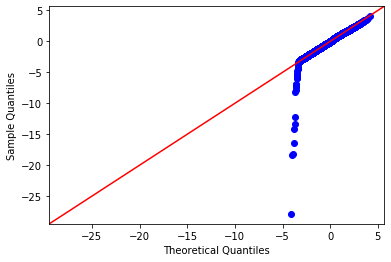

In [4]:
fig = sm.graphics.qqplot(model.resid, dist = stats.norm, line='45', fit = True);

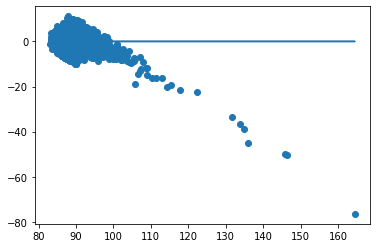

In [5]:
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))])


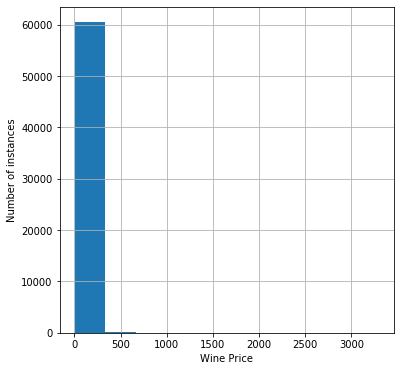

In [6]:
df['price'].hist(figsize=(6,6));
plt.xlabel('Wine Price');
plt.ylabel('Number of instances');

In [7]:
df['logprice'] = np.log(df['price'])

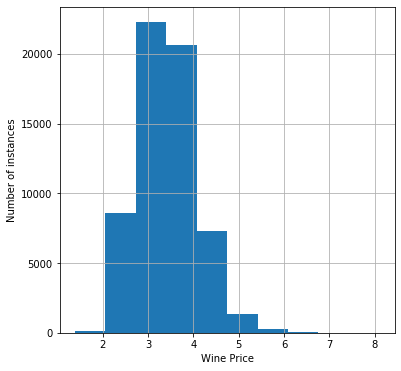

In [8]:
df['logprice'].hist(figsize=(6,6));
plt.xlabel('Wine Price');
plt.ylabel('Number of instances');

In [9]:
wine_prices = df['logprice']

In [10]:
scaled_wine_prices = (wine_prices - np.mean(wine_prices)) / np.sqrt(np.var(wine_prices))

In [11]:
df['scaled_logprice'] = scaled_wine_prices

In [12]:
outcome = 'points'

x_cols= ['scaled_logprice',
       'prov_beaujolais', 'prov_bordeaux', 'prov_burgundy', 'prov_california',
       'prov_central_italy', 'prov_champagne', 'prov_colorado',
       'prov_france_other', 'prov_idaho', 'prov_languedoc_roussillon',
       'prov_loire_valley', 'prov_lombardy', 'prov_michigan', 'prov_new_york',
       'prov_northeastern_italy', 'prov_oregon', 'prov_piedmont',
       'prov_provence', 'prov_rhône_valley', 'prov_sicily_and_sardinia',
       'prov_southern_italy', 'prov_southwest_france', 'prov_texas',
       'prov_tuscany', 'prov_veneto', 'prov_virginia', 'prov_washington',
       'taster_alexander_peartree', 'taster_anna_lee_c_iijima',
       'taster_anne_krebiehl_mw', 'taster_carrie_dykes', 'taster_jim_gordon',
       'taster_joe_czerwinski', 'taster_kerin_okeefe', 'taster_lauren_buzzeo',
       'taster_matt_kettmann', 'taster_paul_gregutt', 'taster_roger_voss',
       'taster_sean_p_sullivan', 'taster_susan_kostrzewa',
       'taster_virginie_boone', 'grape_chardonnay', 'grape_malbec',
       'grape_merlot', 'grape_pinot_grigio', 'grape_pinot_noir',
       'grape_red_blend', 'grape_riesling', 'grape_rosé',
       'grape_sauvignon_blanc', 'grape_white_blend', 'grape_zinfandel',
       'vintage_2001', 'vintage_2002', 'vintage_2003',
       'vintage_2004', 'vintage_2005', 'vintage_2006', 'vintage_2007',
       'vintage_2008', 'vintage_2009', 'vintage_2010', 'vintage_2011',
       'vintage_2012', 'vintage_2013', 'vintage_2014', 'vintage_2015',
       'vintage_2016']

predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 points   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     624.1
Date:                Fri, 29 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:07:34   Log-Likelihood:            -1.3900e+05
No. Observations:               60657   AIC:                         2.781e+05
Df Residuals:                   60587   BIC:                         2.788e+05
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    87.3198      0.205    425.136      0.000      86.917      87.722
scaled_logprice               1.9739      0.011    175.204      0.000       1.952       1.996
prov_beaujolais               1.0261      0.144      7.128      0.000       0.744       1.308
prov_bordeaux                 0.5694      0.112      5.073      0.000       0.349       0.789
prov_burgundy                -0.1111      0.112     -0.993      0.321      -0.330       0.108
prov_california               0.1805      0.173      1.044      0.296      -0.158       0.519
prov_central_italy            1.0868      0.191      5.689      0.000       0.712       1.461
prov_champagne                0.9312      0.248      3.756      0.000       0.445       1.417
prov_colorado                -1.7188      0.396     -4.339      0.000      -2.495      -0.942
prov_france_other             0.1145      0.161      0.710      0.478      -0.202       0.431
prov_idaho                   -0.3745      0.577     -0.649      0.516      -1.505       0.756
prov_languedoc_roussillon     1.3332      0.256      5.210      0.000       0.832       1.835
prov_loire_valley             0.8831      0.120      7.378      0.000       0.649       1.118
prov_lombardy                 1.3537      0.228      5.931      0.000       0.906       1.801
prov_michigan                -1.8854      0.361     -5.227      0.000      -2.592      -1.178
prov_new_york                -0.5195      0.254     -2.048      0.041      -1.017      -0.022
prov_northeastern_italy       0.9665      0.178      5.440      0.000       0.618       1.315
prov_oregon                  -0.4493      0.573     -0.784      0.433      -1.572       0.674
prov_piedmont                 1.2457      0.181      6.888      0.000       0.891       1.600
prov_provence                 1.4996      0.137     10.929      0.000       1.231       1.769
prov_rhône_valley             1.7267      0.230      7.501      0.000       1.275       2.178
prov_sicily_and_sardinia      1.5472      0.186      8.333      0.000       1.183       1.911
prov_southern_italy           1.4125      0.190      7.441      0.000       1.040       1.785
prov_southwest_france         1.6755      0.128     13.050      0.000       1.424       1.927
prov_texas                   -2.0603      0.386     -5.332      0.000      -2.818      -1.303
prov_tuscany                  1.4435      0.177      8.139      0.000       1.096       1.791
prov_veneto                   0.8486      0.184      4.617      0.000       0.488       1.209
prov_virginia                -1.5445      0.213     -7.254      0.000      -1.962      -1.127
prov_washington               0.4853      0.573      0.846      0.397      -0.639       1.609
taster_alexander_peartree     0.1642      0.213      0.772      0.440      

## Test for Normality

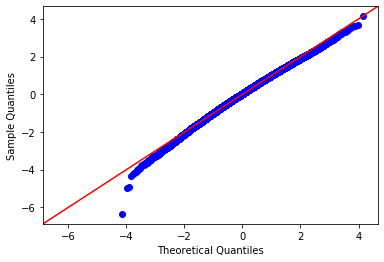

In [13]:
fig = sm.graphics.qqplot(model.resid, dist = stats.norm, line='45', fit = True);

## Test for homoscedacity

Text(0.5, 0, 'Predicted Values')

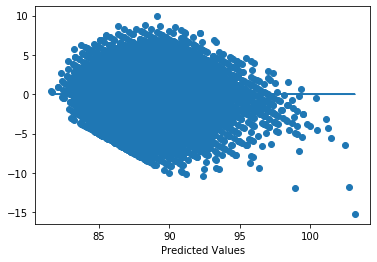

In [14]:
plt.scatter(model.predict(df[x_cols]), model.resid)
plt.plot(model.predict(df[x_cols]), [0 for i in range(len(df))])
plt.xlabel('Predicted Values')

## Test for multicolinearity 

In [15]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
multicolin_total = list(zip(x_cols, vif))

## Ridge Lasso Regression

In [16]:
y = df[['points']]
X = df.drop(['points', 'price'], axis=1)

In [17]:
#test train split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [18]:
scale = StandardScaler()
X_train_transformed = scale.fit_transform(X_train)
X_test_transformed = scale.transform(X_test)

In [19]:
#ridge regression
ridge = Ridge(alpha=.5)
ridge.fit(X_train_transformed, y_train)

#Lasso regression
lasso = Lasso(alpha=.5)
lasso.fit(X_train_transformed, y_train)

#linear regression
lin = LinearRegression()
lin.fit(X_train_transformed, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
X_train_transformed.shape

(42459, 74)

In [21]:
X_test_transformed.shape

(18198, 74)

In [22]:
#ridge predictions
y_h_ridge_train = ridge.predict(X_train_transformed)
y_h_ridge_test = ridge.predict(X_test_transformed)

#generate predications for the lasso regression
y_h_lasso_train = np.reshape(lasso.predict(X_train_transformed), (42459, 1))
y_h_lasso_test = np.reshape(lasso.predict(X_test_transformed), (18198, 1))

#linear predications
y_h_lin_train = lin.predict(X_train_transformed)
y_h_lin_test = lin.predict(X_test_transformed)

In [23]:
print('Train RMSE Ridge Model', np.sqrt(np.sum((y_train - y_h_ridge_train)**2)/df.shape[0]))
print('Test RMSE Ridge Model', np.sqrt(np.sum((y_test - y_h_ridge_test)**2)/df.shape[0]))
print('\n')

print('Train RMSE Lasso Model', np.sqrt(np.sum((y_train - y_h_lasso_train)**2)/df.shape[0]))
print('Test RMSE Lasso Model', np.sqrt(np.sum((y_test - y_h_lasso_test)**2)/df.shape[0]))
print('\n')

print('Train RMSE Unpenalized Linear Model', np.sqrt(np.sum((y_train - lin.predict(X_train_transformed))**2)/df.shape[0]))
print('Test RMSE Unpenalized Linear Model', np.sqrt(np.sum((y_test - lin.predict(X_test_transformed))**2)/df.shape[0]))

Train RMSE Ridge Model points    2.002771
dtype: float64
Test RMSE Ridge Model points    1.310843
dtype: float64


Train RMSE Lasso Model points    2.160861
dtype: float64
Test RMSE Lasso Model points    1.410738
dtype: float64


Train RMSE Unpenalized Linear Model points    2.002883
dtype: float64
Test RMSE Unpenalized Linear Model points    1.311065
dtype: float64
